<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/TempoDiReazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Misure ripetute ed incertezza di grandezze derivate

Spesso, negli esperimenti di fisica la misura di una stessa grandezza fisica può essere ripetuta varie volte.

Ad esempio, consideriamo la misura del periodo di un pendolo di lunghezza $l$ che viene posto in oscillazione per piccoli angoli ($\lesssim 5^{\circ}-10^{\circ}$).
Sia $T_{1}$ il risultato della prima misura del periodo, $T_{2}$ il risultato della seconda... $T_{n}$ il risultato della n-esima.

Se viene utilizzato un cronometro sufficientemente sensibile, le misure non saranno fra loro tutte uguali, ma ci saranno delle piccole differenze.
Queste, ad esempio, sono dovute ai tempi di reazione delle persone coinvolte tanto nel porre inizio e fine all'acquisizione con il cronometro quanto nel mettere in moto il pendolo.

A partire dai valori {$T_{1}$, $T_{2}$,..., $T_{n}$}, si desidera determinare la **migliore stima** possibile
- del valore del periodo del pendolo
- dell'incertezza associata alla misura

### Misura del tempo di reazione

Consideriamo la misura del tempo di reazione di una persona come esempio per mostrare alcuni concetti di statistica, incertezza delle misure, propagazione dell'incertezza di una grandezza fisica sulle grandezze da essa derivate etc...

Tutte queste considerazioni sono qui applicate al caso della misura del tempo di reazione, ma si applicano alle misure di qualsiasi grandeza fisica, dalle più immediate alle più elaborate.

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

mpl.rc("font", family = "Dejavu Sans", weight = "normal", size = 16)

In [3]:
def acquire (niter, filename = None):
    """
    Function to acquire niter measurements of the response time of the person running the execution.
    ----------
    Arguments:
        - niter, int
          number of measurements to be done. The execution of the function will end after all the niter values have been taken
        - filename, str
          if not None, name of the file to which data will be saved
    """
    if niter <= 0:
        raise ValueError("Numero di iterazioni non valido, inserisci un valore maggiore di 0.")
    if type(filename) != str:
        raise ValueError("Nome del file inserito non valido, deve essere una stringa.")
    i, flag, t0, delta_t = 0, True, time.time(), []
    print ("***... Starting the acquisition ...***")
    while flag:
        input("... Waiting for ENTER ...")
        t1 = time.time()
        delta_time = t1-t0
        print (delta_time)
        if i > 0:
            delta_t.append(delta_time)
        t0 = t1
        i = i+1
        if i > niter + 1:
            flag = False
    print ("***... End of the acquisition ...***")
    delta_t = np.array(delta_t)
    print (delta_t)
    if filename is not None:
        save_to_file(filename, delta_t)
    return delta_t

def take_from_file (filename):
    """
    Function to load an array from a file
    ----------
    Arguments:
        - filename, str
          name of the file from which data will be loaded
    """
    return np.loadtxt(filename, unpack = True)

def save_to_file (filename, array):
    """
    Function to save to a file called filename the data stored in array
    ----------
    Arguments:
        - filename, str
          name of the file to be written
        - array, array-like
          array to be saved
    """
    np.savetxt(filename, np.transpose(array))
    print ("\nSuccessfully saved data into file %s" % filename)

def concatenate (*args):
    """
    Function to concatenate an arbitrary number of arrays
    ----------
    Arguments:
        - *args,
          arrays to be concatenated
    """
    return np.concatenate((args))

In [16]:
delta_t = acquire(30, "reaction_time.txt")

***... Starting the acquisition ...***
... Waiting for ENTER ...
18.287620306015015
... Waiting for ENTER ...
2.9441497325897217
... Waiting for ENTER ...
3.25673508644104
... Waiting for ENTER ...
2.9259603023529053
... Waiting for ENTER ...
2.779843807220459
... Waiting for ENTER ...
2.896488666534424
... Waiting for ENTER ...
3.0416717529296875
... Waiting for ENTER ...
3.034635305404663
... Waiting for ENTER ...
2.9972212314605713
... Waiting for ENTER ...
3.002239465713501
... Waiting for ENTER ...
2.9421584606170654
... Waiting for ENTER ...
3.091538667678833
... Waiting for ENTER ...
2.9043474197387695
... Waiting for ENTER ...
2.8295738697052
... Waiting for ENTER ...
7.384520769119263
... Waiting for ENTER ...
1.9624919891357422
... Waiting for ENTER ...
2.9346420764923096
... Waiting for ENTER ...
2.924473285675049
... Waiting for ENTER ...
2.9471311569213867
... Waiting for ENTER ...
2.9161500930786133
... Waiting for ENTER ...
3.4926140308380127
... Waiting for ENTER ...
2.

In [4]:
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/reaction_time_concatenated.txt

--2025-01-26 08:54:48--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/reaction_time_concatenated.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4550 (4.4K) [text/plain]
Saving to: ‘reaction_time_concatenated.txt’

reaction_time_conca 100%[===================>]   4.44K  --.-KB/s    in 0s      

2025-01-26 08:54:49 (48.0 MB/s) - ‘reaction_time_concatenated.txt’ saved [4550/4550]



In [17]:
delta_t = take_from_file("reaction_time_concatenated.txt")  # Dati di Davide presi a casa
delta_t1 = take_from_file("reaction_time.txt")
#delta_t5 = take_from_file("reaction_time_.txt")             # Dati
#delta_t3 = take_from_file("reaction_time_Giorgia.txt")      # Dati

In [18]:
def gaus(x, A, mu, sigma):
    return A * np.exp( -0.5 * ((x - mu)/sigma)**2 )

def plot_data (data, fig = None, ax = None, show_plot = False):
    avg = np.round(np.average(data), 0)
    bins = np.arange(avg - 0.4, avg + 0.41, 0.05)

    if fig is None:
        fig, ax = plt.subplots(figsize = (8, 6))
    ax.hist(data, histtype = "step", bins = bins, lw = 2.)
    ax.set_xlabel("$\Delta$t (s)")
    ax.set_ylabel("Numero di occorrenze")
    ax.grid(which = "both")
    return fig, ax

In [19]:
avg = 3
bins = np.arange(avg - 0.4, avg + 0.41, 0.05)
bins  # Questi sono gli estremi dei bin dell'istogramma

array([2.6 , 2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 ,
       3.15, 3.2 , 3.25, 3.3 , 3.35, 3.4 ])

'\nax.plot(\n    x,\n    gaus(x, 10., 3., 0.12),\n    color = "orange", ls = "dashed"\n)\n\nax.plot(\n    x,\n    gaus(x, 10., 3., 0.02),\n    color = "red", ls = "dashed"\n)'

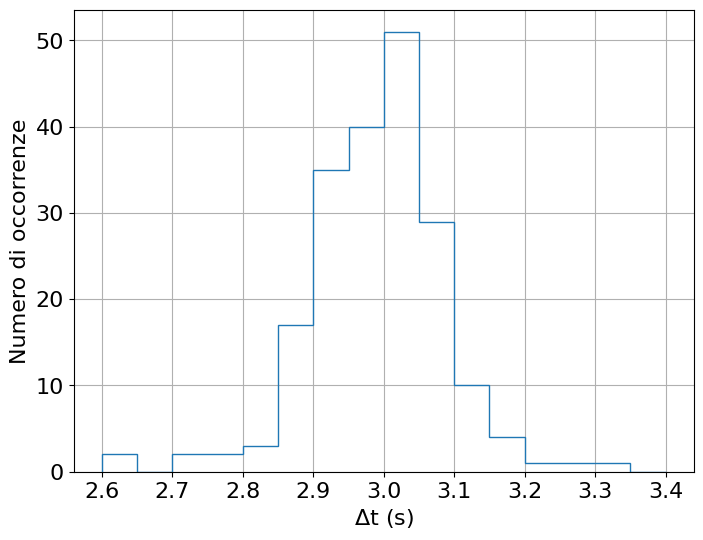

In [23]:
#print (len(delta_t1))
#fig, ax = plot_data(delta_t)
#fig, ax = plot_data(delta_t1)               # Dati di Andrea
fig, ax = plot_data(concatenate(delta_t, delta_t1))

#fig, ax = plot_data(delta_t2, fig, ax)
#fig, ax = plot_data(delta_t3, fig, ax)
#fig, ax = plot_data(concatenate(delta_t3, delta_t1, delta_t2))

x = np.linspace(2.6, 3.4)
"""
ax.plot(
    x,
    gaus(x, 10., 3., 0.12),
    color = "orange", ls = "dashed"
)

ax.plot(
    x,
    gaus(x, 10., 3., 0.02),
    color = "red", ls = "dashed"
)"""

In [ ]:
plot_data(delta_t2);   # Dati di Libero

In [ ]:
plot_data(delta_t3);    # Dati di Giorgia

In [ ]:
plot_data(delta_t);    # Dati di Davide presi a casa

### Messaggio importante:

**Molto spesso, l'istogramma dei risultati delle misure ripetute di una grandezza fisica tende ad essere una Gaussiana.**

**Tanto maggiore è il numero di misure, tanto l'istogramma è simile ad una Gaussiana).**

In [13]:
def gaus(x, A, mu, sigma):
    return A * np.exp( -0.5 * ((x - mu)/sigma)**2 )

def fit_histogram (data):
    fig, ax = plt.subplots(figsize = (8, 6))
    avg = np.round(np.average(data), 0)
    bins = np.arange(avg - 0.4, avg + 0.41, 0.05)
    values, bins, _ = ax.hist(data, histtype = "step", bins = bins)
    bin_centers = (bins[0:-1] + bins[1:]) * 0.5
    bin_width = bins[1] - bins[0]
    ax.errorbar(
        bin_centers, values,
        xerr = bin_width/2., yerr = np.sqrt(values),
        ls = "none", color = "midnightblue"
    )
    ax.set_xlabel("$\Delta$t (s)")
    ax.set_ylabel("Numero di occorrenze")
    ax.grid(which = "both")
    popt, cov = curve_fit(
        f = gaus,
        xdata = bin_centers,
        ydata = np.where(values>0, values, 0.1),
        sigma = np.where(values>0, np.sqrt(values), 0.2),
        p0 = [10., avg, 0.06],
        bounds = ((0.1, avg-0.01, 0.01), (1e4, avg+0.01, 0.4))
    )
    sigmas = [ cov[i][i]**0.5 for i in range(len(cov)) ]
    x = np.linspace(min(bins), max(bins))
    ax.plot(
        x,
        gaus(x, *popt),
        color = "red", ls = "dashed"
    )
    string = "$y = A \\times e^{- \\frac{(x-\mu)^{2}}{2 \sigma^{2}}}$\n\n"
    names = ["A", "$\mu$", "$\sigma$"]
    for i in range(3):
        string += "%s = %.3f $\pm$ %.3f\n" % (names[i], popt[i], sigmas[i])
    ax.text(
        0.05, 0.65,
        string,
        transform = ax.transAxes,
        fontsize = 14,
    )
    #return popt, cov

#fit_histogram(delta_t1)
#fit_histogram(concatenate(delta_t, delta_t1))
#save_to_file

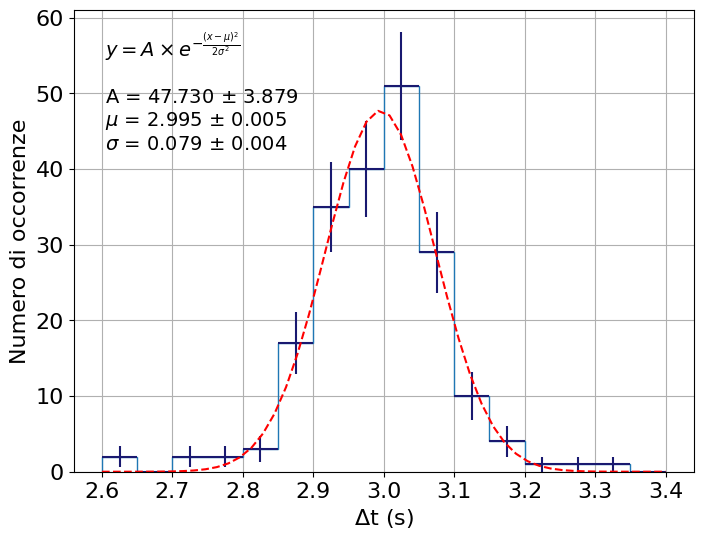

In [24]:
fit_histogram(concatenate(delta_t, delta_t1))

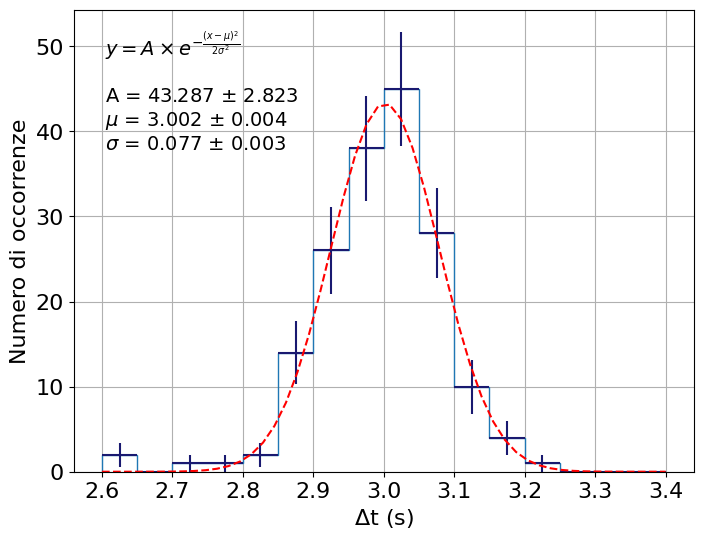

In [25]:
fit_histogram(concatenate(delta_t))    # Davide, a casa

In [ ]:
color_data = ["red", "midnightblue"]
color_fit = ["red", "midnightblue"]
xmin = [0.05, 0.62]

def fit_more_histograms (data, fig = None, ax = None, i = 0, label = "Data"):
    if fig is None:
        fig, ax = plt.subplots(figsize = (8, 6))

    avg = np.round(np.average(data), 0)
    bins = np.arange(avg - 0.4, avg + 0.41, 0.05)
    values, bins, _ = ax.hist(data, histtype = "step", bins = bins, ls = "dotted", color = color_data[i])
    bin_centers = (bins[0:-1] + bins[1:]) * 0.5
    bin_width = bins[1] - bins[0]

    ax.errorbar(
        bin_centers, values,
        xerr = bin_width/2., yerr = np.sqrt(values),
        ls = "none", color = color_data[i],
        label = label,
    )
    ax.set_xlabel("$\Delta$t (s)")
    ax.set_ylabel("Numero di occorrenze")
    ax.grid(which = "both")
    popt, cov = curve_fit(
        f = gaus,
        xdata = bin_centers,
        ydata = np.where(values>0, values, 0.1),
        sigma = np.where(values>0, np.sqrt(values), 0.2),
        p0 = [10., avg, 0.06],
        bounds = ((0.1, avg-0.01, 0.01), (1e4, avg+0.01, 0.4))
    )
    sigmas = [ cov[j][j]**0.5 for j in range(len(cov)) ]
    x = np.linspace(min(bins), max(bins))
    ax.plot(
        x,
        gaus(x, *popt),
        color = color_fit[i], ls = "dashed",
    )
    string = "y = A * e$^{- \\frac{(x-\mu)^{2}}{2 \sigma^{2}}}$\n\n"
    names = ["A", "$\mu$", "$\sigma$"]
    for j in range(3):
        string += "%s = %.3f $\pm$ %.3f\n" % (names[j], popt[j], sigmas[j])

    ax.text(
        xmin[i],
        0.65,
        string,
        transform = ax.transAxes,
        fontsize = 14,
        color = color_fit[i],
    )
    return fig, ax

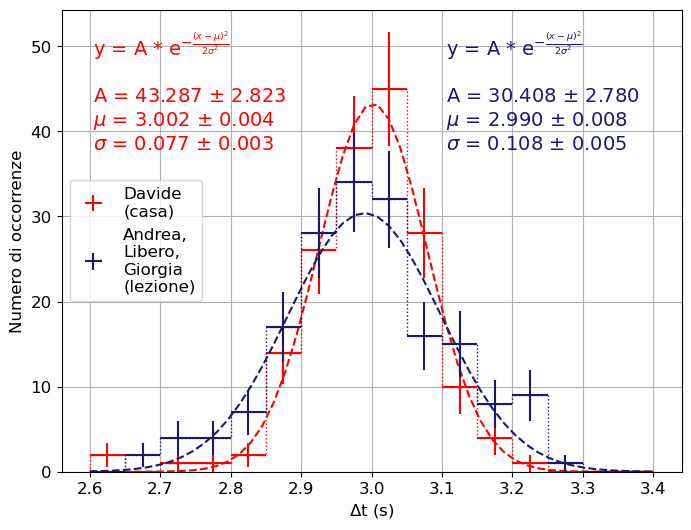

In [ ]:
fig, ax = fit_more_histograms(delta_t, i = 0, label = "Davide\n(casa)")
fig,  ax = fit_more_histograms(concatenate(delta_t1, delta_t2, delta_t3, delta_t4), fig = fig, ax = ax, i = 1, label = "Lezione")
ax.grid(which = "both")
ax.legend(loc = "center left");

In [ ]:
save_to_file("reaction_time_concatenated_.txt", concatenate(delta_t, delta_t1))

In [ ]:
delta_t    # vettore dei tempi presi da Davide

In [ ]:
delta_all = concatenate(delta_t1, delta_t2, delta_t3)  # metto insieme i dati di Andrea, Libero e Giorgia
print(len(delta_all))
print(delta_all)   # Vettore complessivo dei dati presi a lezione

In [ ]:
np.round(np.mean(delta_all), 3)   # media aritmetica

In [ ]:
np.mean(delta_all)

In [ ]:
(2.74365234 - np.mean(delta_all))**2

In [ ]:
np.round((np.max(delta_all) - np.min(delta_all))/2., 3)   # semi-dispersione massima

In [ ]:
np.round(np.sum(delta_all - np.mean(delta_all)), 9)    # La media delle differenze fra le singole misure e la media aritmetica è, per definizione, nulla!

In [ ]:
np.round(np.std(delta_all), 3)   # deviazione standard (aka "sigma"), lasciando tutti i dati --> viene un valore non compatibile con la sigma ricavata dal fit

In [ ]:
mask = (delta_all < 3.4)*(delta_all > 2.6)  # serve fare una pulizia dei dati, togliendo quelli che sono certamente errati, lasciando solo quelli fra 2.6 e 3.4
print(len(delta_all[mask]))
np.round(np.std(delta_all[mask]), 3)   # deviazione standard (aka "sigma") dei dati dopo aver tolto i dati totalmente errati --> ora la deviazione standard si è avvicinata al valore trovato con il fit, ossia 0.108 +/- 0.007

In [ ]:
# Formula esplicita del calcolo della deviazione standard
# NB. la funzione round serve soltanto per dire a che cifra decimale arrotondare il numero che viene stampato su schermo
np.round(
    np.sqrt(
        ( 1. / (len(delta_all[mask])) ) * np.sum( (delta_all[mask] - np.mean(delta_all[mask])) ** 2)
    ),
    3
)

## Conclusioni

Tipicamente, come migliore stima $\bar{T}$ del valore della grandezza fisica per la quale sono state fatte le misure ripetute, si può utilizzare la media aritmetica delle misure effettuate {$T_{1}$, $T_{2}$,..., $T_{n}$}.

$\bar{T} = \sum^{n}_{i=1} \frac{T_{i}}{n} = \frac{T_{1} + T_{2} + ... + T_{n}}{n}$

Come stima dell'incertezza, ci sono vari metodi, alcuni più grossolani, altri più accurati.

 - semi-dispersione massima = $\frac{ max(T_{i})_{(i=1, ..., n))} - min(T_{i})_{(i=1, ..., n))} } {2}$
 - deviazione standard = $\sqrt{ \frac{1}{n} \times \sum^{n}_{i=1} (T_{i} - \bar{T}) ^ {2} }$

### Qual è il significato di queste stime?

 - $\bar{T}$ rappresenta una stima accurata della media $\mu$ della Gaussiana.

 - La deviazione standard rappresenta una stima accurata della larghezza $\sigma$ della Gaussiana.

 - La semidispersione massima rappresenta l'incertezza della misura in modo grossolano in quanto essa dipende unicamente da due misure (il massimo ed il minimo di queste), senza considerare opportunamente tutte le rimanenti.

Qualora sia possibile fare più misure, sempre meglio usare la deviazione standard, calcolata come prima detto.



## Grandezze derivate







### E se invece si ha a che fare con una grandezza derivata da quelle misurate sperimentalmente?

Prendiamo il caso della misura della costante elastica della molla che faremo in laboratorio.
In laboratorio vengono misurate le seguenti grandezze
- la lunghezza $L_{0}$ della molla a riposo
- la massa $m$ il cui peso fa allungare la molla
- lo spostamento $L$ prodotto dall'azione della massa $m$

Qualora possibile, si provvederà a fare misure ripetute di ciascuna di queste grandezze, e per ognuna di queste sarà calcolata la media (sarà indicata con la barretta sopra la lettera) e l'incertezza associata (indicata con $\sigma$ e usando come pedice la grandezza cui si riferisce):
- $\bar{L_{0}} \pm \sigma_{L_{0}}$
- $\bar{m} \pm \sigma_{m}$
- $\bar{L} \pm \sigma_{L}$

La formula che lega la costante elastica della molla con queste grandezze è

$\bar{k} = \frac{\bar{m}g}{\bar{x}}$

dove $x=L - L_{0}$

#### Come posso calcolare l'incertezza su $x$ a partire da quella su $L$ e su $L_{0}$?

Questo è un problema di calcolo della propagazione dell'errore su una grandezza derivata ($x$) a partire dalle incertezze sulle grandezze misurate direttamente ($L$ e $L_{0}$).

Nei casi standard in cui nelle formule ci sono solo addizioni/sottrazioni, prodotti/rapporti, la formula di propagazione dell'errore che permette di calcolare l'incertezza sulla stima di $x$, chiamiamola $\sigma_{x}$, si riduce a (fidatevi)

$\bar{x} = \bar{L} - \bar{L_{0}}$

$\sigma_{x} = \bar{x} \sqrt{ \left( \frac{ \sigma_{L}}{\bar{L}} \right) ^{2} + \left( \frac{ \sigma_{L_{0}}}{\bar{L_{0}}} \right) ^{2}}$

Equivalentemente, l'errore relativo sulla grandezza derivata, cioè $\frac{\sigma_{x}}{\bar{x}}$, è la somma in quadratura degli errori relativi delle grandezze da cui deriva, ossia $\frac{ \sigma_{L}}{\bar{L}}$ e $\frac{ \sigma_{L_{0}}}{\bar{L_{0}}}$.

#### Come posso calcolare l'incertezza su $k$ a partire da quella su $m$ e su $x$?

La formula per la propagazione dell'incertezza su $k$ a partire da quella su $m$ ed $x$ è sempre la stessa anche qui:

$\bar{k} = \frac{\bar{m}g}{\bar{x}}$

$\sigma_{k} = \bar{k} \sqrt{ \left( \frac{ \sigma_{m}}{\bar{m}} \right) ^{2} + \left( \frac{ \sigma_{x}}{\bar{x}} \right) ^{2}}$